<a href="https://colab.research.google.com/github/msuraj248/DeepLearning/blob/Keras/Keras_tutorial_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import keras
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [45]:
train_lables = []
train_samples = []

In [49]:
for i in range(50):
  random_younger = randint(15,64)
  train_samples.append(random_younger)
  train_lables.append(1)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_lables.append(0)

for i in range(1000):
  random_younger = randint(15,64)
  train_samples.append(random_younger)
  train_lables.append(0)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_lables.append(1)

In [ ]:
for i in train_lables:
  print(i)

In [62]:
test_lables = []
test_samples = []

for i in range(50):
  random_younger = randint(15,64)
  test_samples.append(random_younger)
  test_lables.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_lables.append(0)

for i in range(1000):
  random_younger = randint(15,64)
  test_samples.append(random_younger)
  test_lables.append(0)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_lables.append(1)

In [52]:
train_lables = np.array(train_lables)
train_samples = np.array(train_samples)
train_lables, train_samples = shuffle(train_lables, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
for i in scaled_train_samples:
  print(i)

In [84]:
test_lables = np.array(test_lables)
test_samples = np.array(test_samples)
test_lables, test_samples = shuffle(test_lables, test_samples)

In [85]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.convolutional import *
from keras.optimizers import Adam
from keras.layers.pooling import *
from keras.utils import sh

In [74]:
model = Sequential([
          Dense(16, input_shape = (1,), activation= 'relu'),
          Dense(32, activation= 'relu'),
          Dense(2, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(x = scaled_train_samples, y = train_lables, validation_split= 0.2 ,batch_size=10, epochs=15, shuffle=True, verbose=2)

In [87]:
prediction = model.predict(x = scaled_test_samples, batch_size=10, verbose=0)

In [ ]:
for i in prediction:
  print(i)

In [88]:
rounded_prediction = np.argmax(prediction, axis= -1)

In [93]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
cm = confusion_matrix(y_true = test_lables, y_pred= rounded_prediction)

In [96]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 959   91]
 [  48 1002]]


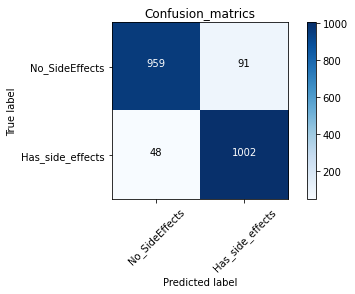

In [99]:
cm_plot_lables= ['No_SideEffects', 'Has_side_effects']
plot_confusion_matrix(cm=cm, classes = cm_plot_lables, title = 'Confusion_matrics')